In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gifter.modeling.data import lemmatized_frame
from gifter.modeling.tokenizer import lemmatize
model = Word2Vec.load_word2vec_format('text8.model.bin', binary=True)

def get_similary(w1, w2):
    try:
        return model.similarity(w1, w2)
    except KeyError:
        return 0

In [2]:
df = lemmatized_frame(filename="../data.json", with_tags=False)

In [3]:
all_categories =  pd.io.json.read_json("../../category_hierarchy.json")
categories = all_categories[all_categories.CategoryLevel == 2][['CategoryName', 'CategoryID']]

In [4]:
categories['lemmatized'] = categories.CategoryName.apply(lambda name: lemmatize(name, with_tags=False))
# remove empty
categories = categories[categories['lemmatized'].apply(len) > 0]
categories['value'] = 0
categories.head(10)

,CategoryName,CategoryID,lemmatized,value
1,Antiquities,37903,[antiquity],0
2,Architectural & Garden,4707,"[architectural, garden]",0
3,Asian Antiques,20082,"[asian, antique]",0
4,Books & Manuscripts,2195,"[book, manuscript]",0
5,Decorative Arts,20086,"[decorative, art]",0
6,Ethnographic,2207,[ethnographic],0
7,Furniture,20091,[furniture],0
8,Home & Hearth,163008,"[home, hearth]",0
9,Linens & Textiles (Pre-1930),2218,"[linen, textile, pre]",0
10,"Maps, Atlases & Globes",37958,"[map, atlase, globe]",0


In [5]:
def count_membership(words, tweet_lemmas):
    return np.mean([
        np.min([get_similary(word, tweet_lemma) for word in words])
        for tweet_lemma in tweet_lemmas
    ])

In [6]:
for idx, cat in categories.iterrows():
    categories.ix[idx, 'value'] = df.lemmas.apply(
        lambda tweet_lemmas: count_membership(cat.lemmatized, tweet_lemmas)
    ).sum()

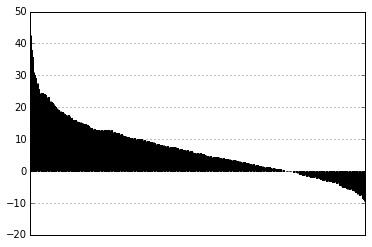

In [7]:
%matplotlib inline
categories.sort('value', ascending=False, inplace=True)
# rozkład
categories.plot(kind='bar', y='value', xticks=(), legend=False)

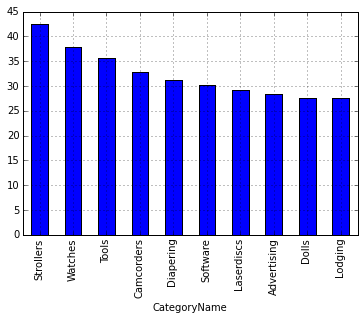

In [8]:
categories.head(10).plot(kind='bar', x='CategoryName', y='value', legend=False)

Random guy